## Paso 1: Carga del conjunto de datos

In [2]:
# Example importing the CSV here

import pandas as pd


dataframe = pd.read_csv('C:/Users/Jaime/Desktop/EUROPEAN MARKET COLLEGE/clase1-minado/INMIGRACION/inmigracion_andorra.csv')
dataframe

,Fecha,Inmigrantes_hombres,Inmigrantes_mujeres,inmigrantes,porcentaje_inmigrantes
0,2020,23.333,22.241,45.574,58.42
1,2015,21.485,20.779,42.264,58.92
2,2010,27.287,24.766,52.053,74.05
3,2005,26.466,23.832,50.298,64.03
4,2000,22.093,20.054,42.147,64.01
5,1995,23.588,20.618,44.206,69.22
6,1990,20.990,17.901,38.891,71.35


In [3]:
# Identificar el tipo de datos de cada columna
data_types = dataframe.dtypes

# Separar las columnas categóricas y numéricas
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(categorical_columns)
print(numeric_columns)

[]
['Fecha', 'Inmigrantes_hombres', 'Inmigrantes_mujeres', 'inmigrantes', 'porcentaje_inmigrantes']


## Paso 2: Realiza un EDA completo

In [4]:
# Obtener las dimensiones
dataframe.shape

(7, 5)

In [5]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Fecha                   7 non-null      int64  
 1   Inmigrantes_hombres     7 non-null      float64
 2   Inmigrantes_mujeres     7 non-null      float64
 3   inmigrantes             7 non-null      float64
 4   porcentaje_inmigrantes  7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


In [6]:
#Eliminar duplicados
if dataframe.duplicated().sum() > 0:
    dataframe = dataframe.drop_duplicates()

In [7]:
#comprobar q se han eliminado duplicados

dataframe.duplicated().sum()

0

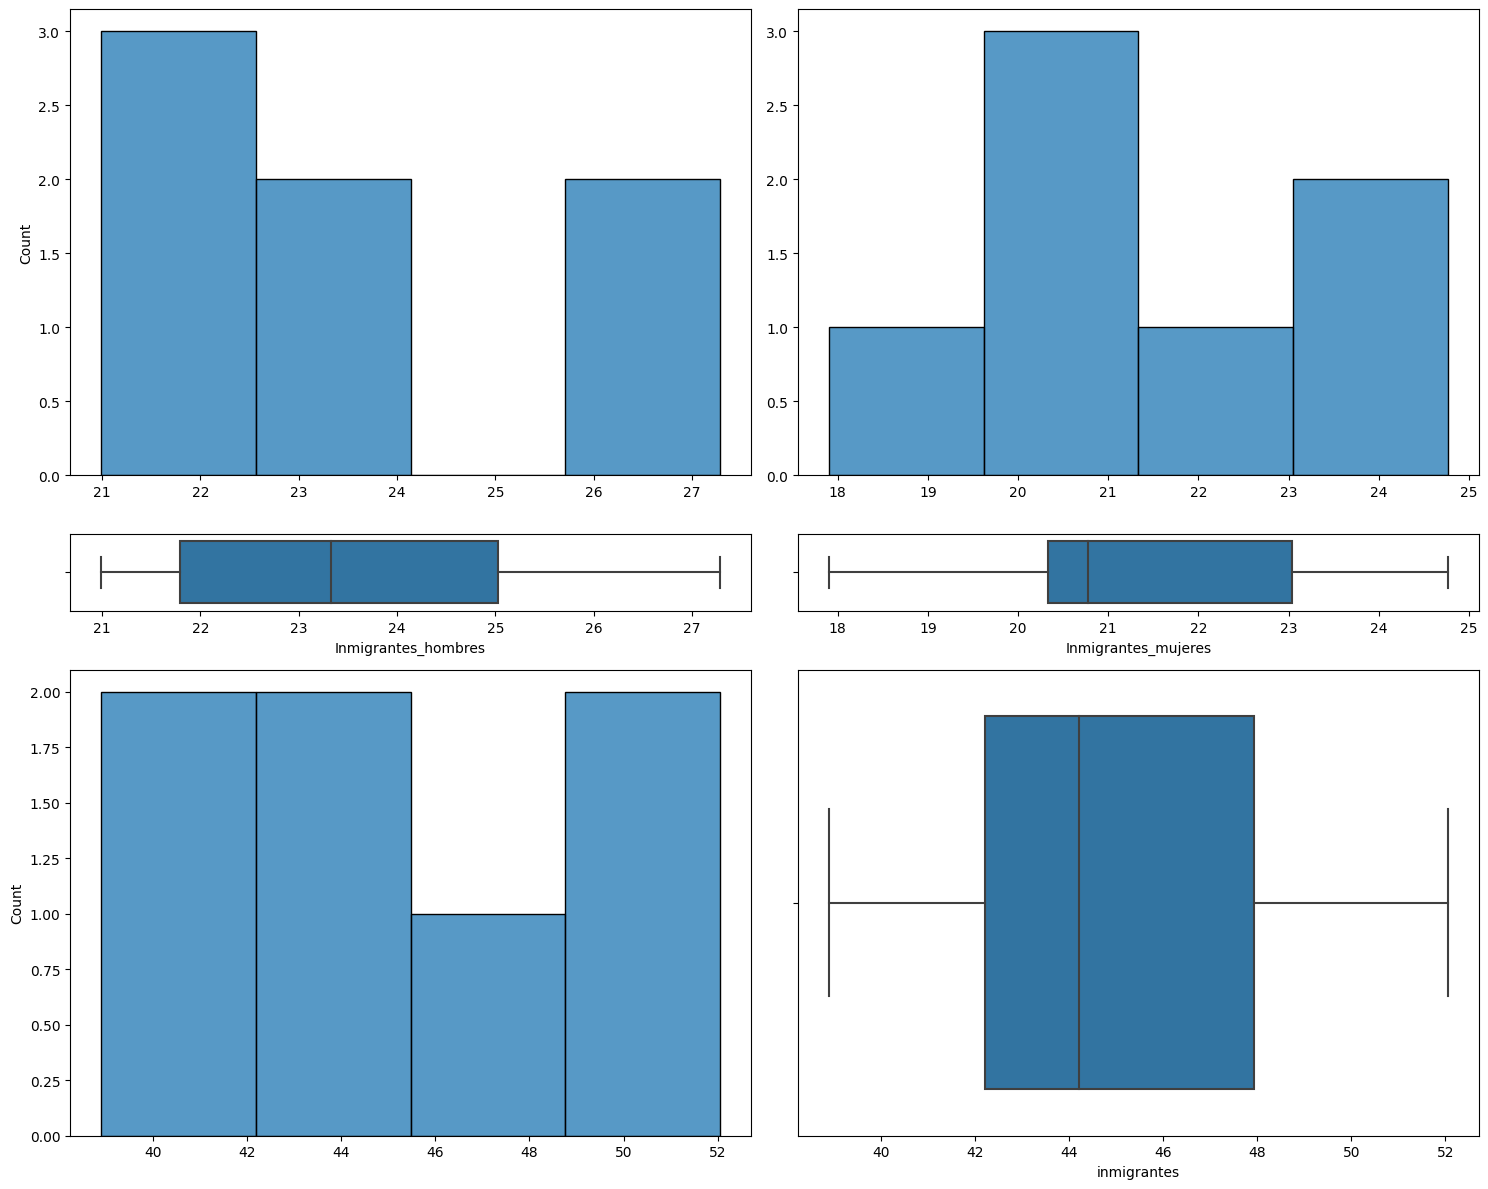

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tu DataFrame se llama df

fig, axis = plt.subplots(3, 2, figsize=(15, 12), gridspec_kw={'height_ratios': [6, 1, 6]})

# Histograma e diagrama de caja para 'Inmigrantes_hombres'
sns.histplot(ax=axis[0, 0], data=dataframe, x='Inmigrantes_hombres').set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=dataframe, x='Inmigrantes_hombres')

# Histograma e diagrama de caja para 'Inmigrantes_mujeres'
sns.histplot(ax=axis[0, 1], data=dataframe, x='Inmigrantes_mujeres').set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=dataframe, x='Inmigrantes_mujeres')

# Histograma e diagrama de caja para 'inmigrantes'
sns.histplot(ax=axis[2, 0], data=dataframe, x='inmigrantes').set(xlabel=None)
sns.boxplot(ax=axis[2, 1], data=dataframe, x='inmigrantes')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el plot
plt.show()


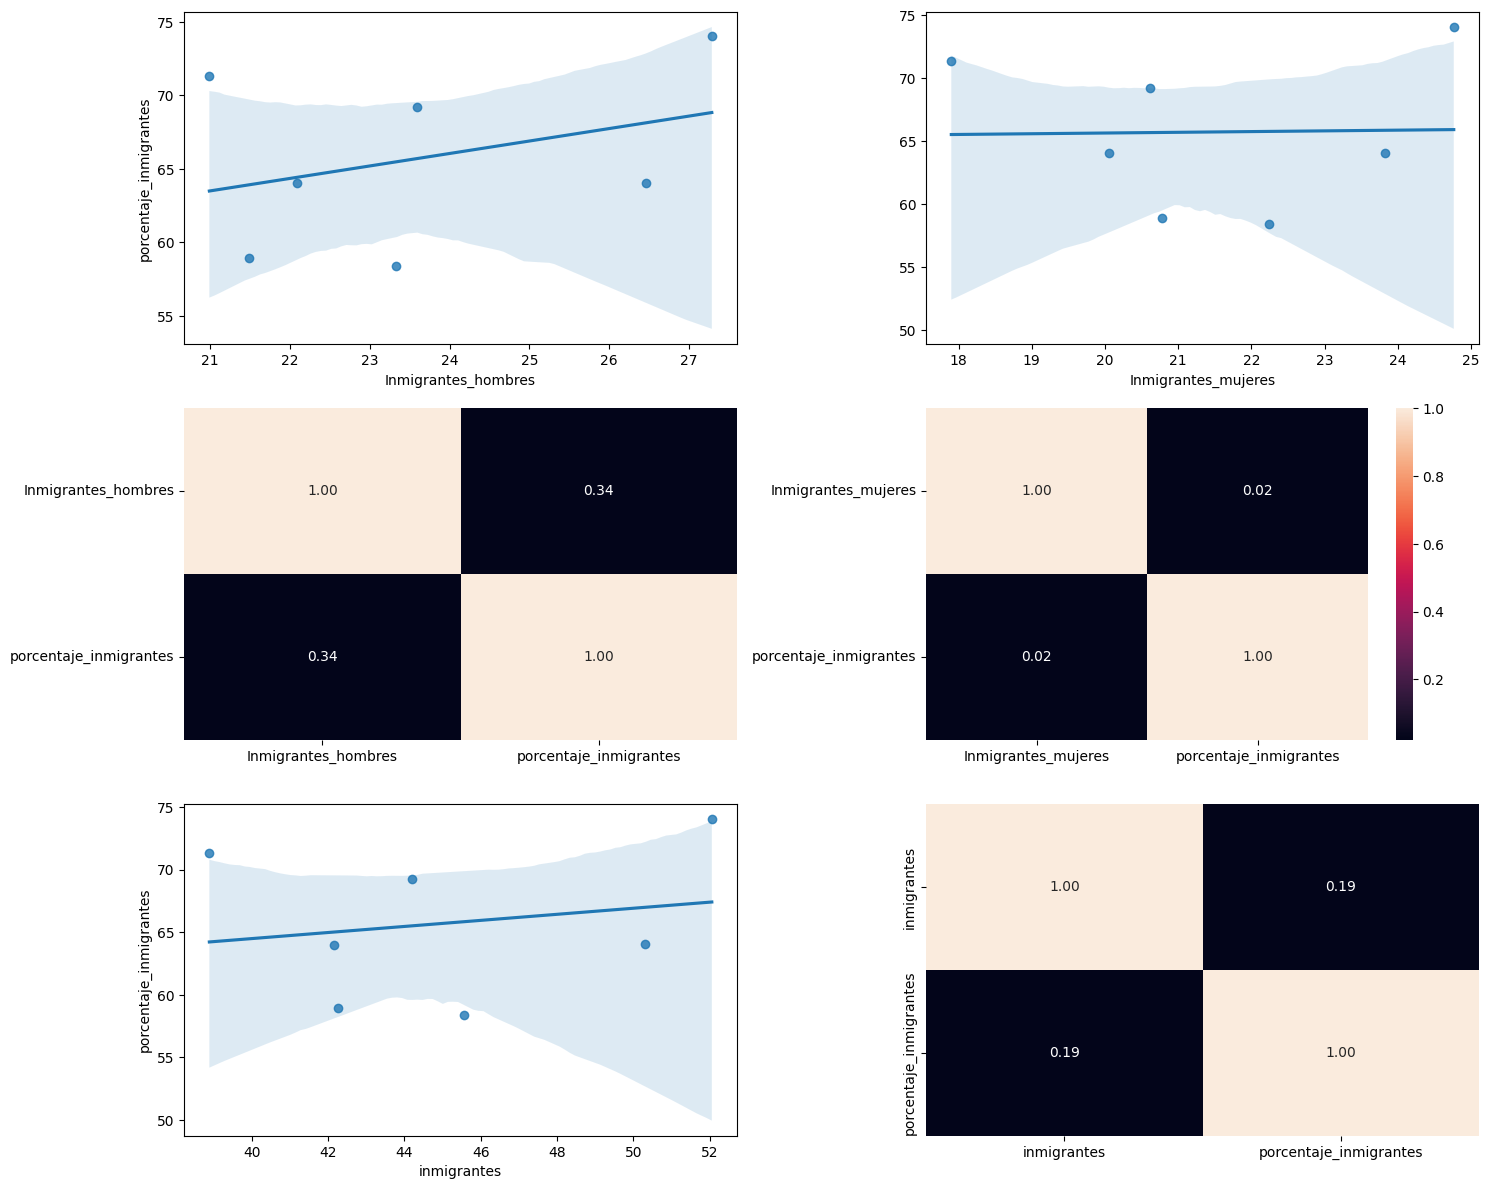

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tu DataFrame se llama df

fig, axis = plt.subplots(3, 2, figsize=(15, 12))

# Diagrama de dispersión y correlación para 'Inmigrantes_hombres' vs 'porcentaje_inmigrantes'
sns.regplot(ax=axis[0, 0], data=dataframe, x='Inmigrantes_hombres', y='porcentaje_inmigrantes')
sns.heatmap(dataframe[['Inmigrantes_hombres', 'porcentaje_inmigrantes']].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

# Diagrama de dispersión y correlación para 'Inmigrantes_mujeres' vs 'porcentaje_inmigrantes'
sns.regplot(ax=axis[0, 1], data=dataframe, x='Inmigrantes_mujeres', y='porcentaje_inmigrantes').set(ylabel=None)
sns.heatmap(dataframe[['Inmigrantes_mujeres', 'porcentaje_inmigrantes']].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

# Diagrama de dispersión y correlación para 'inmigrantes' vs 'porcentaje_inmigrantes'
sns.regplot(ax=axis[2, 0], data=dataframe, x='inmigrantes', y='porcentaje_inmigrantes')
sns.heatmap(dataframe[['inmigrantes', 'porcentaje_inmigrantes']].corr(), annot=True, fmt=".2f", ax=axis[2, 1], cbar=False)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el plot
plt.show()


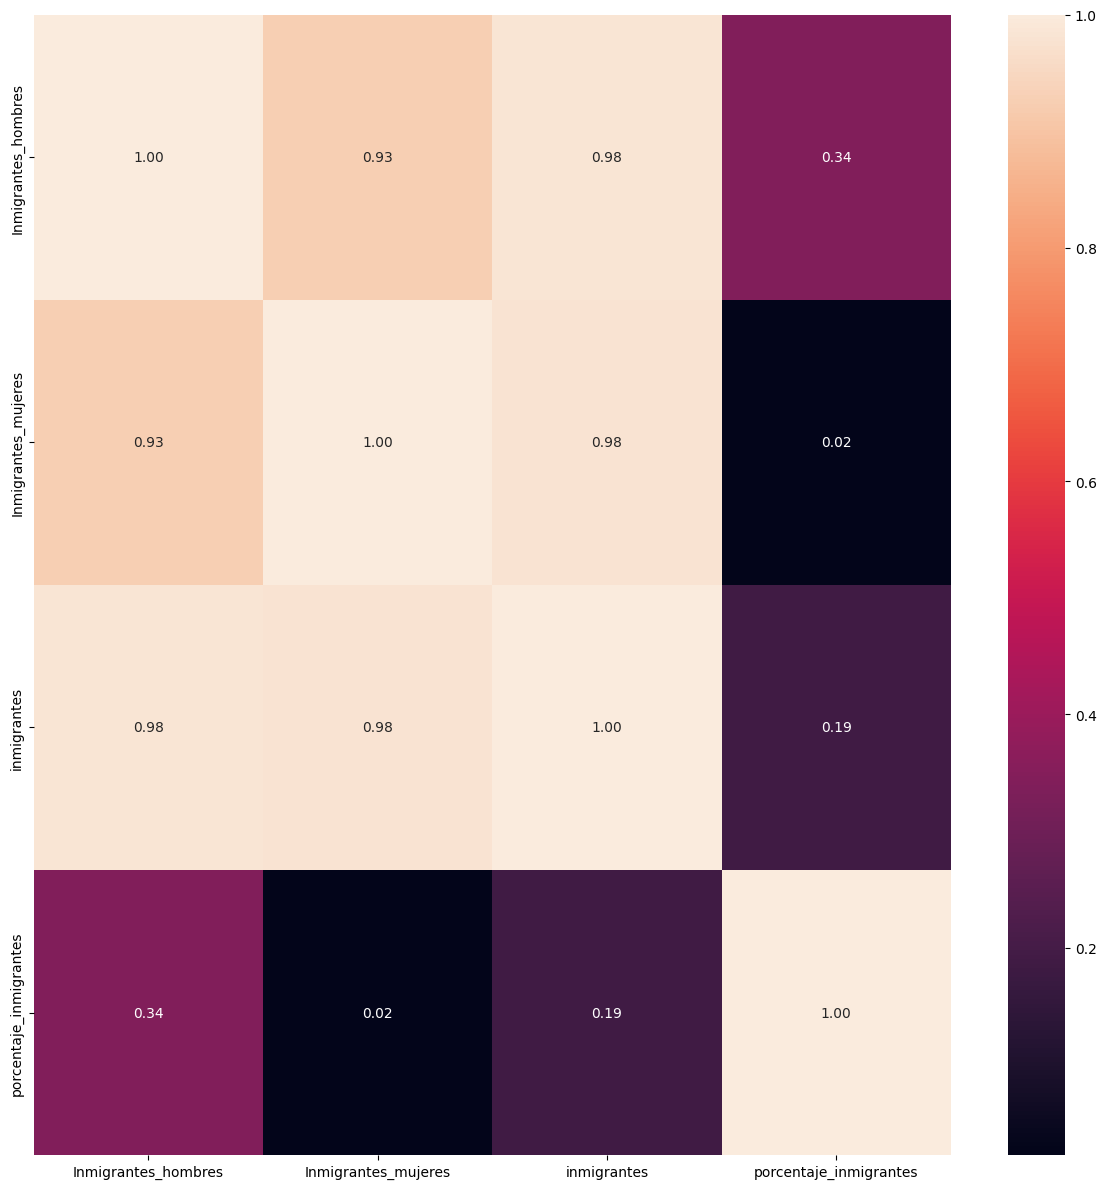

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tu DataFrame se llama df
numeric_variables = ['Inmigrantes_hombres', 'Inmigrantes_mujeres', 'inmigrantes', 'porcentaje_inmigrantes']

# Crear una figura de subplots con configuración de 1 fila y 1 columna
fig, axis = plt.subplots(figsize=(12, 12))

# Calcular la matriz de correlación para las variables numéricas
correlation_matrix = dataframe[numeric_variables].corr()

# Generar el heatmap de correlaciones
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", ax=axis)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


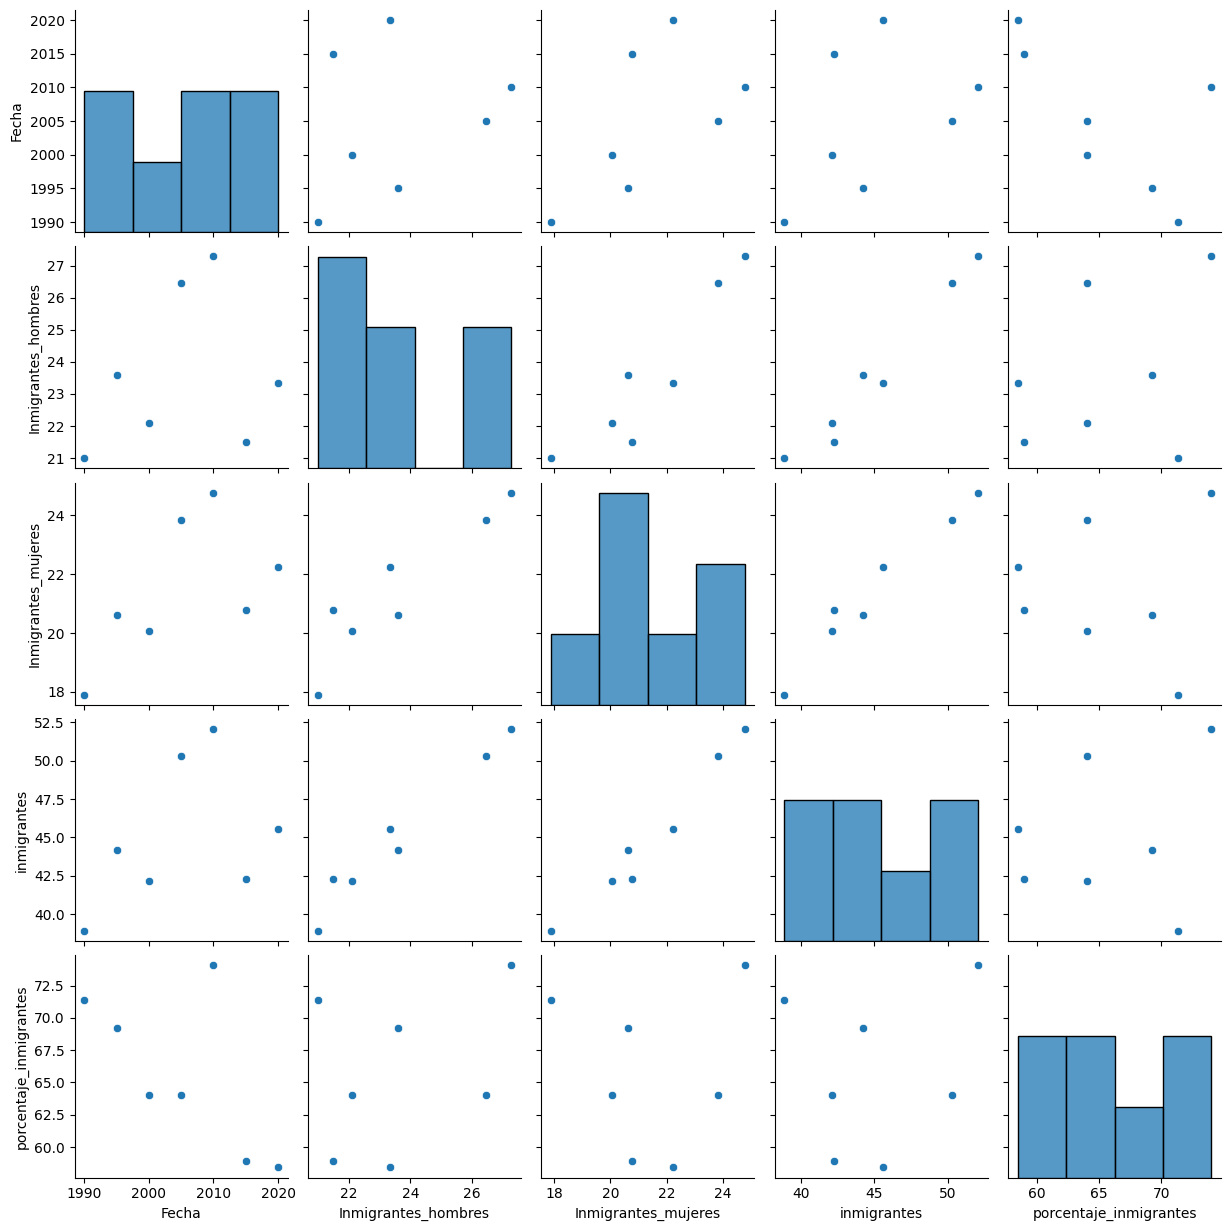

In [11]:
#dibujar el pairplot

sns.pairplot(data = dataframe)

In [12]:
import plotly.express as px

# Supongamos que tu DataFrame se llama df

# Crear el gráfico de líneas interactivo
fig_line = px.line(dataframe, x='Fecha', y=dataframe.columns[1:], # Tomando las columnas desde la tercera en adelante
                   title='Comparación de todas las variables con respecto a inmigrantes a lo largo del tiempo')

# Mostrar el gráfico
fig_line.show()


In [13]:
import plotly.express as px

# Supongamos que tu DataFrame se llama df

# Crear el gráfico de barras apiladas con barmode='group'
fig_bar = px.bar(dataframe, x='Fecha', y=['Inmigrantes_hombres', 'Inmigrantes_mujeres', 'inmigrantes'],
                 color_discrete_sequence=['blue', 'purple', 'orange'],
                 title='Distribución de Inmigrantes por Fecha',
                 labels={'value': 'Cantidad', 'variable': 'Tipo de Inmigrante'},
                 height=500,
                 barmode='group')  # Utiliza 'group' para barras al lado de la otra

# Mostrar el gráfico
fig_bar.show()


In [14]:
# Guardar el gráfico como archivo HTML
fig_bar.write_html('inmigracion_grafico_barras_total.html')

In [15]:
import plotly.express as px

# Supongamos que tu DataFrame se llama df

# Crear el gráfico de líneas
fig_line = px.line(dataframe, x='Fecha', y=['Inmigrantes_hombres', 'Inmigrantes_mujeres', 'inmigrantes'],
                   color_discrete_sequence=['blue', 'purple', 'orange'],
                   title='Evolución de la Distribución de Inmigrantes en el Tiempo',
                   labels={'value': 'Cantidad', 'variable': 'Tipo de Inmigrante'},
                   height=500)

# Mostrar el gráfico
fig_line.show()


In [16]:
import plotly.io as pio


# Guardar el gráfico como un archivo HTML
pio.write_html(fig_line, file='inmigracion_grafico_lineas_total.html')